In [24]:
%matplotlib inline
import pandas as pd
from getdist import plots
from getdist import MCSamples

import matplotlib.pyplot as plt
import numpy as np
from cosmosis.postprocess import parser
from cosmosis.postprocessing.inputs import read_input
from cosmosis.postprocessing.postprocess import postprocessor_for_sampler
from cosmosis.postprocessing.plots import (
    MetropolisHastingsPlots2D,
    MetropolisHastingsPlots1D,
)

import os
import corner
from chainconsumer import ChainConsumer

from IPython.display import display, Math
from numcosmo_py import Nc
from numcosmo_py import Ncm


# CCL
import pyccl as ccl
from pyccl.halos.massdef import MassDef
import firecrown
import sys 
import math 
import sacc

import sys
sys.path.insert(0,'../scripts')



In [25]:
%matplotlib inline
def generate_triangle_plot(data_path, params):
    """
    Generates a triangle plot for given parameters from the specified data path.
    
    Parameters:
        data_path (str): Path to the input data.
        params (list of tuples): List of tuples containing parameter names and fiducial values.
    """
    
    data_c = [read_input(data_path)][0]
        
    names = [param[0] for param in params]
    labels = [rf"{param[0]}" for param in params]  # LaTeX-style labels
    fiducial_values = {param[0]: param[1] for param in params}
    
    settings = {
        "mult_bias_correction_order": 0,
        "smooth_scale_2D": 3,
        "smooth_scale_1D": 3,
        "boundary_correction_order": 0,
    }
    data_so = [[line[i] for i in range(len(params))] for line in data_c[1]["data"][1][0]]   
    sample_red = MCSamples(samples=np.array(data_so[int(len(data_so) * 0.3) : ]), names=names, labels=labels, settings=settings)
    print(len(data_so))
    # Triangle plot
    g = plots.get_subplot_plotter()
    g.triangle_plot(
        [sample_red],
        filled=True,
        alphas=[0.8, 0.55],
        contour_ls="-",
        contour_lws=1,
        fine_bins=1,
        marker_args={"linewidth": 4},
        markers=fiducial_values,
    )
    plt.savefig(f'{data_path.replace('number_counts_samples.txt','triangle_plot.png')}')
    plt.show()

    print(fiducial_values)
    print("\n Using data from both \n")
    for param_name in names:
        display(Math(sample_red.getInlineLatex(param_name, limit=1)))
    return data_so

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cosmo_mr_cp/output/number_counts_samples.txt
Removed no burn in
1800


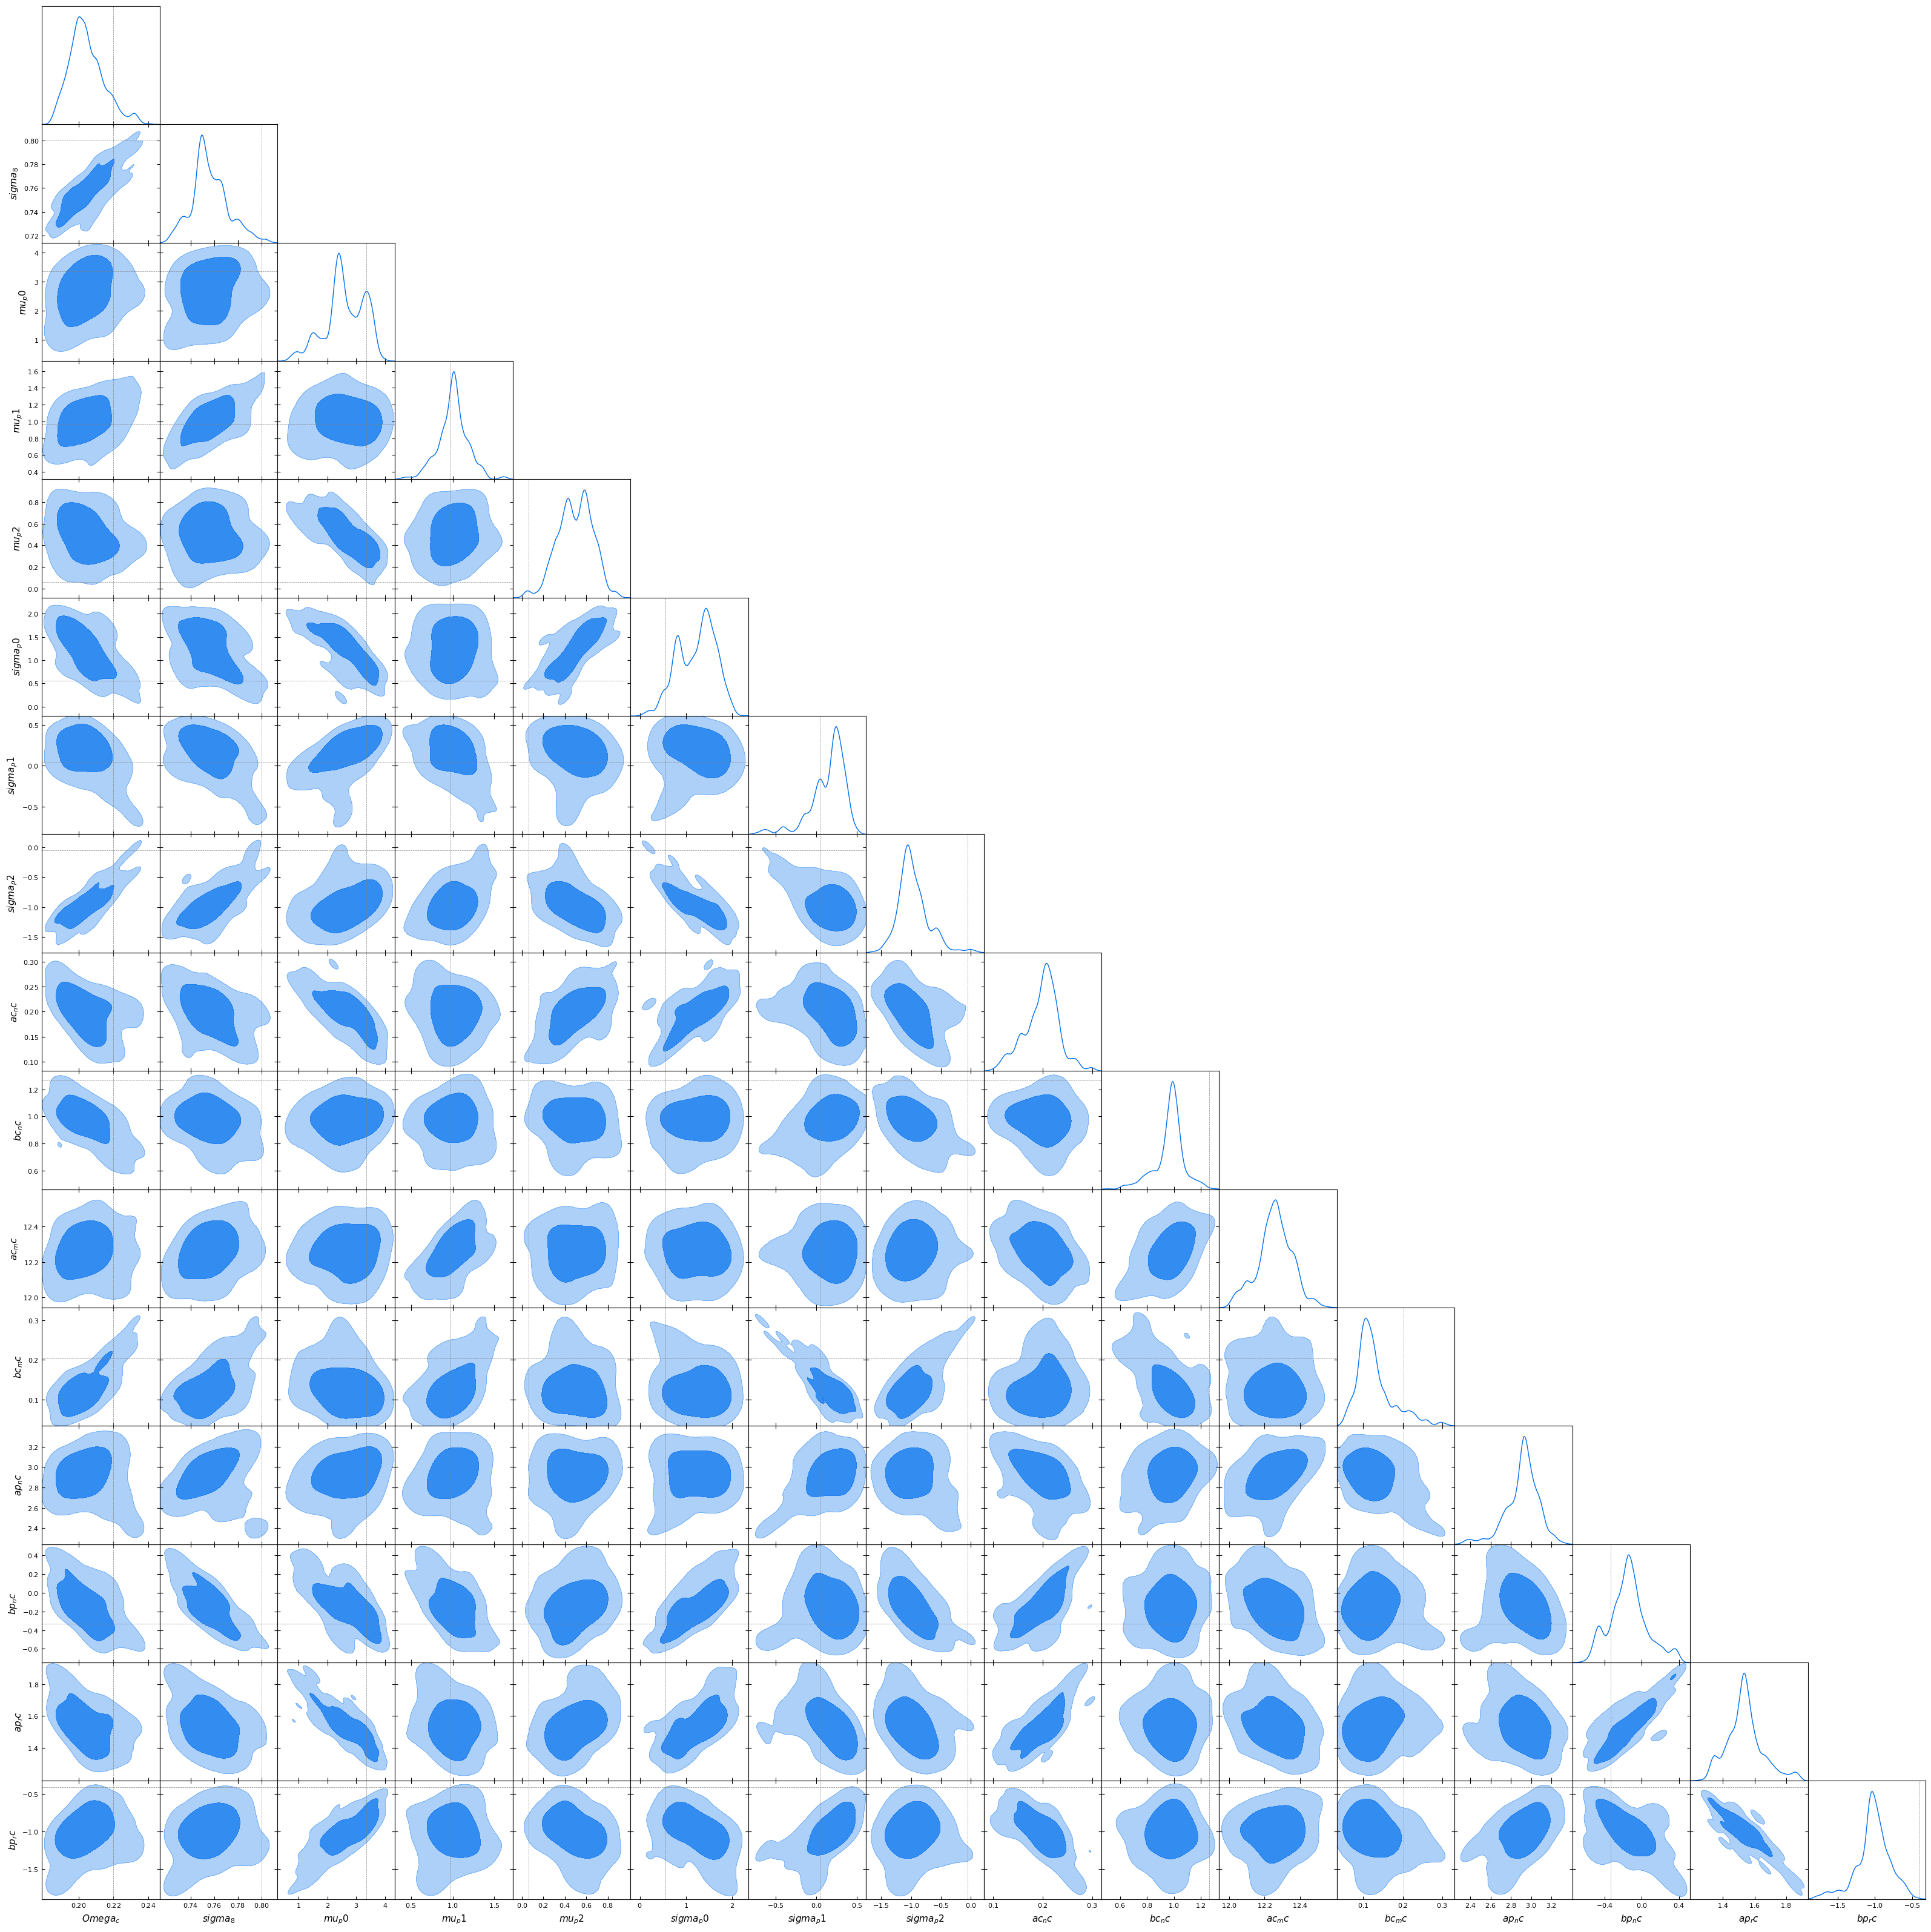

{'Omega_c': 0.22, 'sigma_8': 0.8, 'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05, 'ac_nc': 0.38, 'bc_nc': 1.2634, 'ac_mc': 13.31, 'bc_mc': 0.2025, 'ap_nc': 3.9193, 'bp_nc': -0.3323, 'ap_rc': 1.1839, 'bp_rc': -0.4077}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cosmo/output/number_counts_samples.txt
Removed no burn in
103560


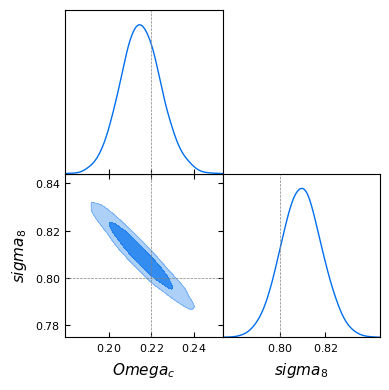

{'Omega_c': 0.22, 'sigma_8': 0.8}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cosmo_cp/output/number_counts_samples.txt
Removed no burn in
160080


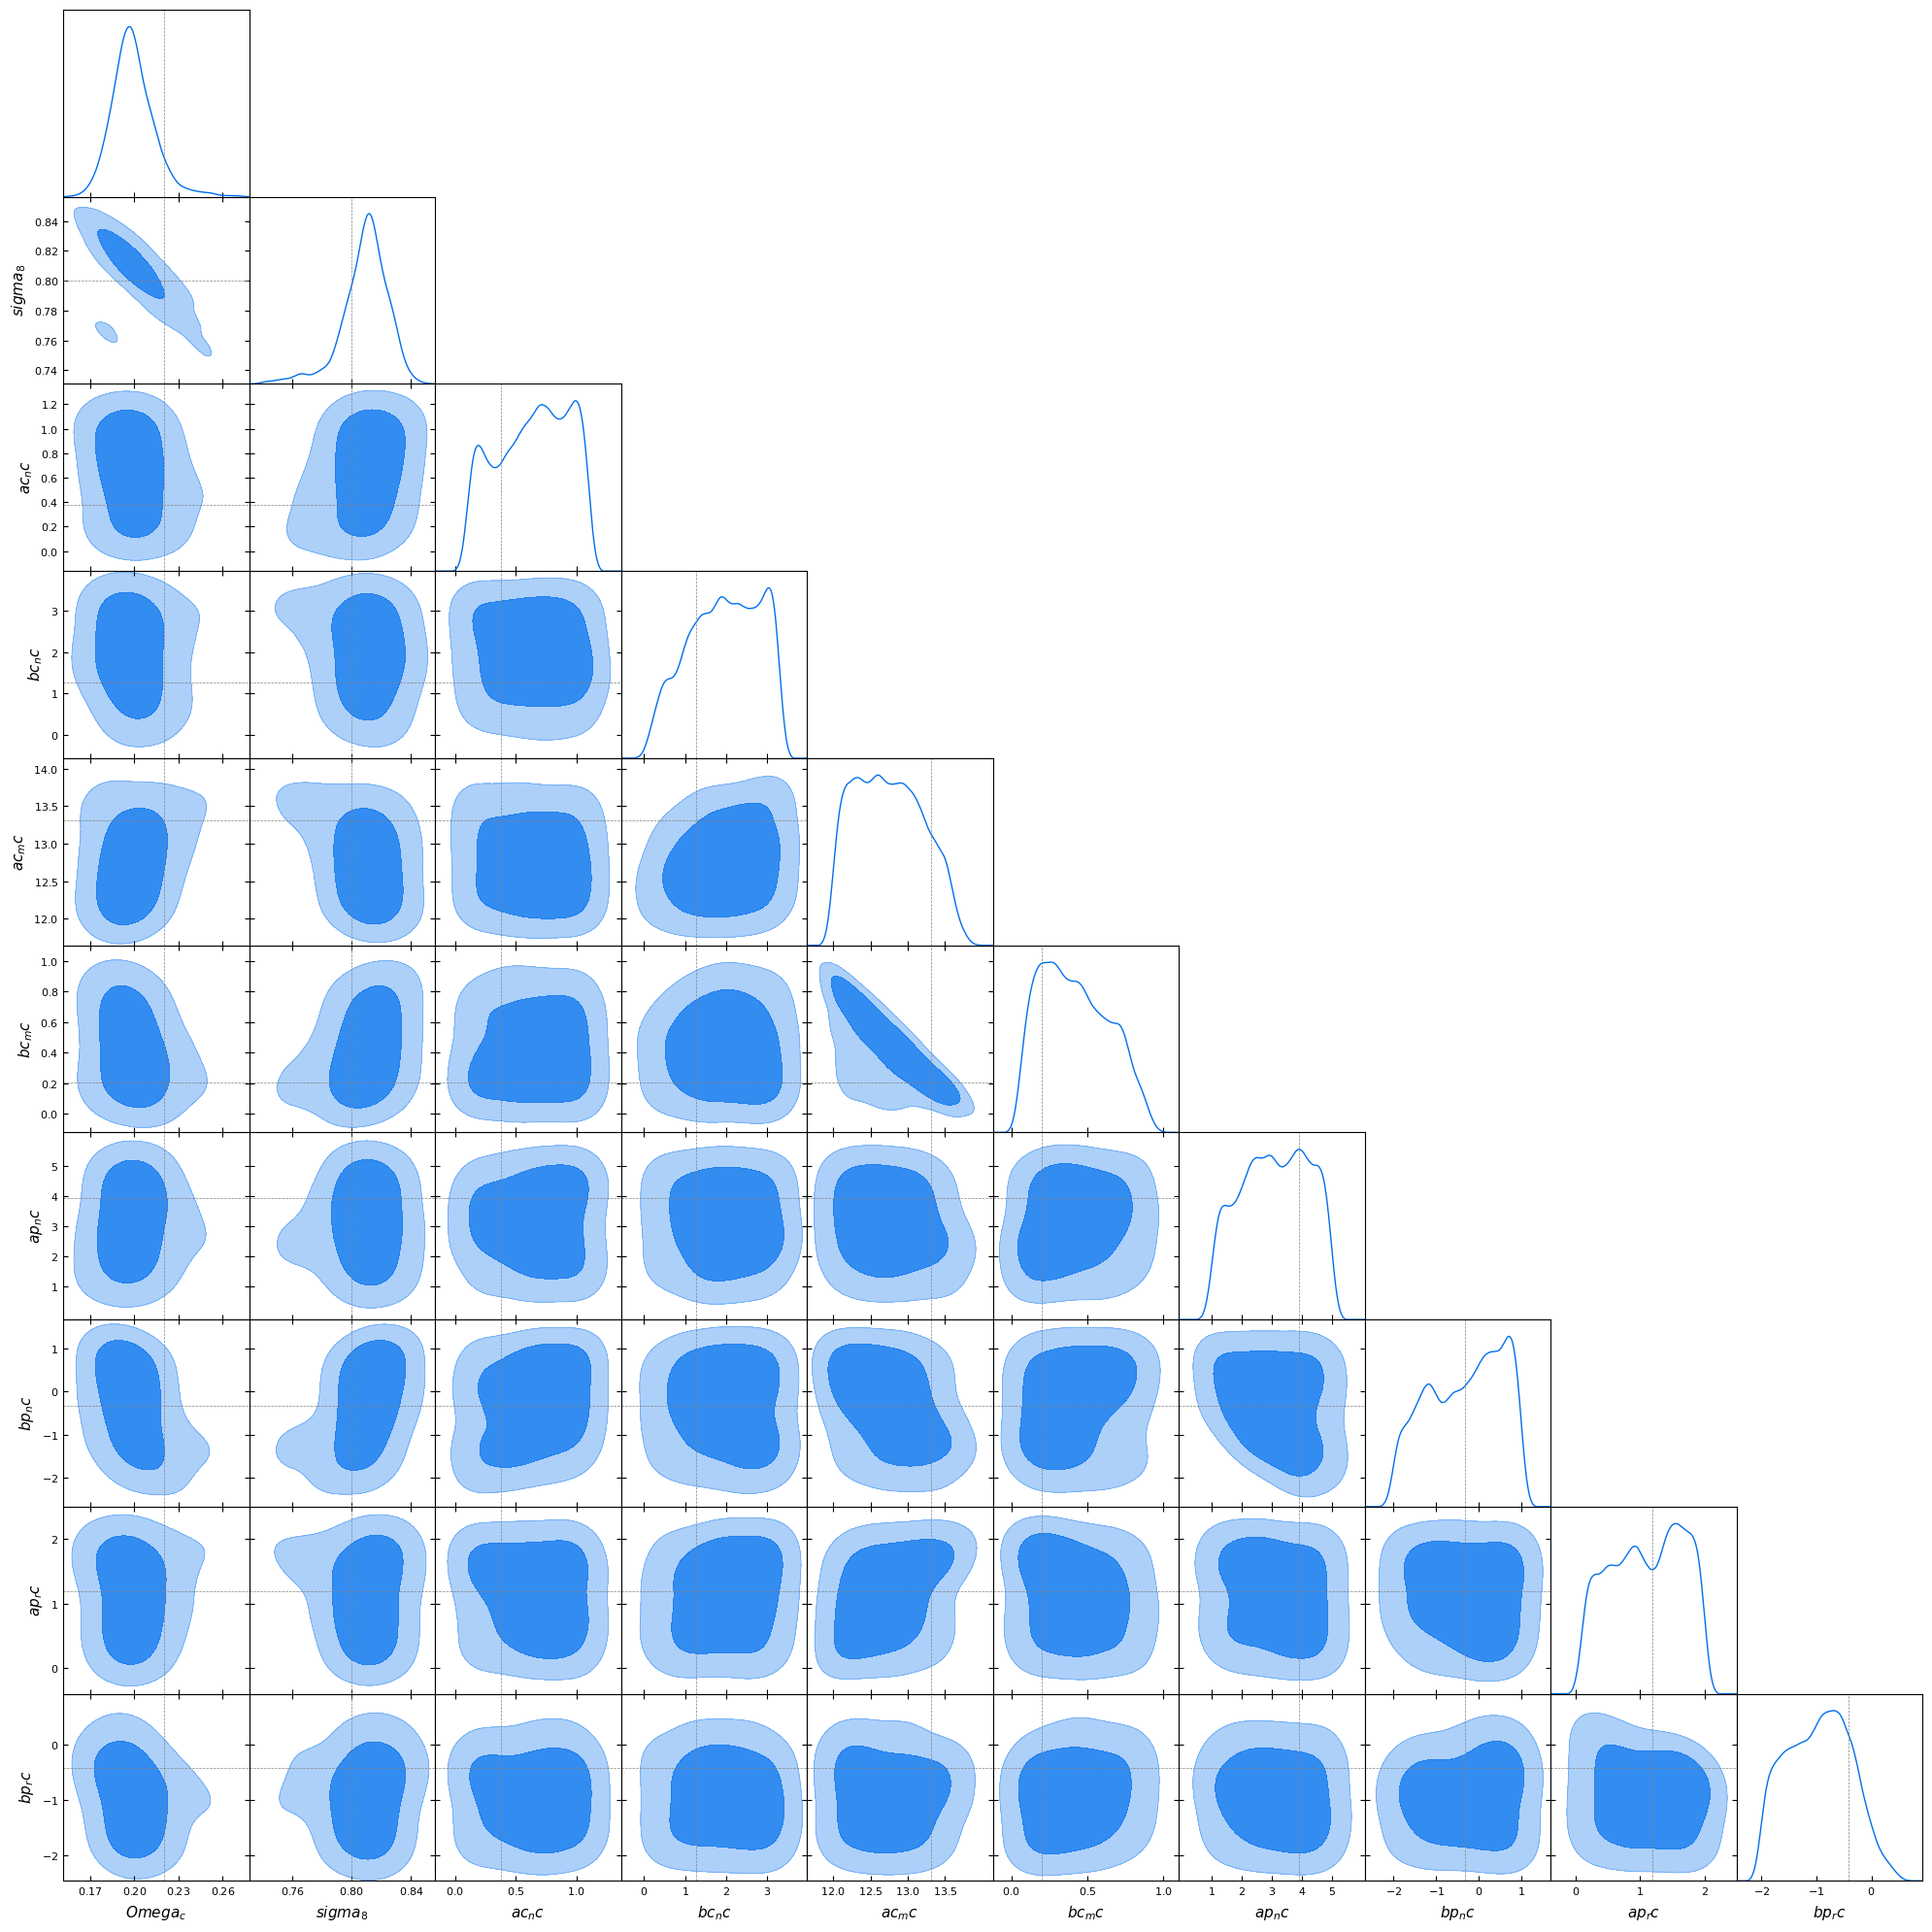

{'Omega_c': 0.22, 'sigma_8': 0.8, 'ac_nc': 0.38, 'bc_nc': 1.2634, 'ac_mc': 13.31, 'bc_mc': 0.2025, 'ap_nc': 3.9193, 'bp_nc': -0.3323, 'ap_rc': 1.1839, 'bp_rc': -0.4077}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cosmo_mr/output/number_counts_samples.txt
Removed no burn in
2400


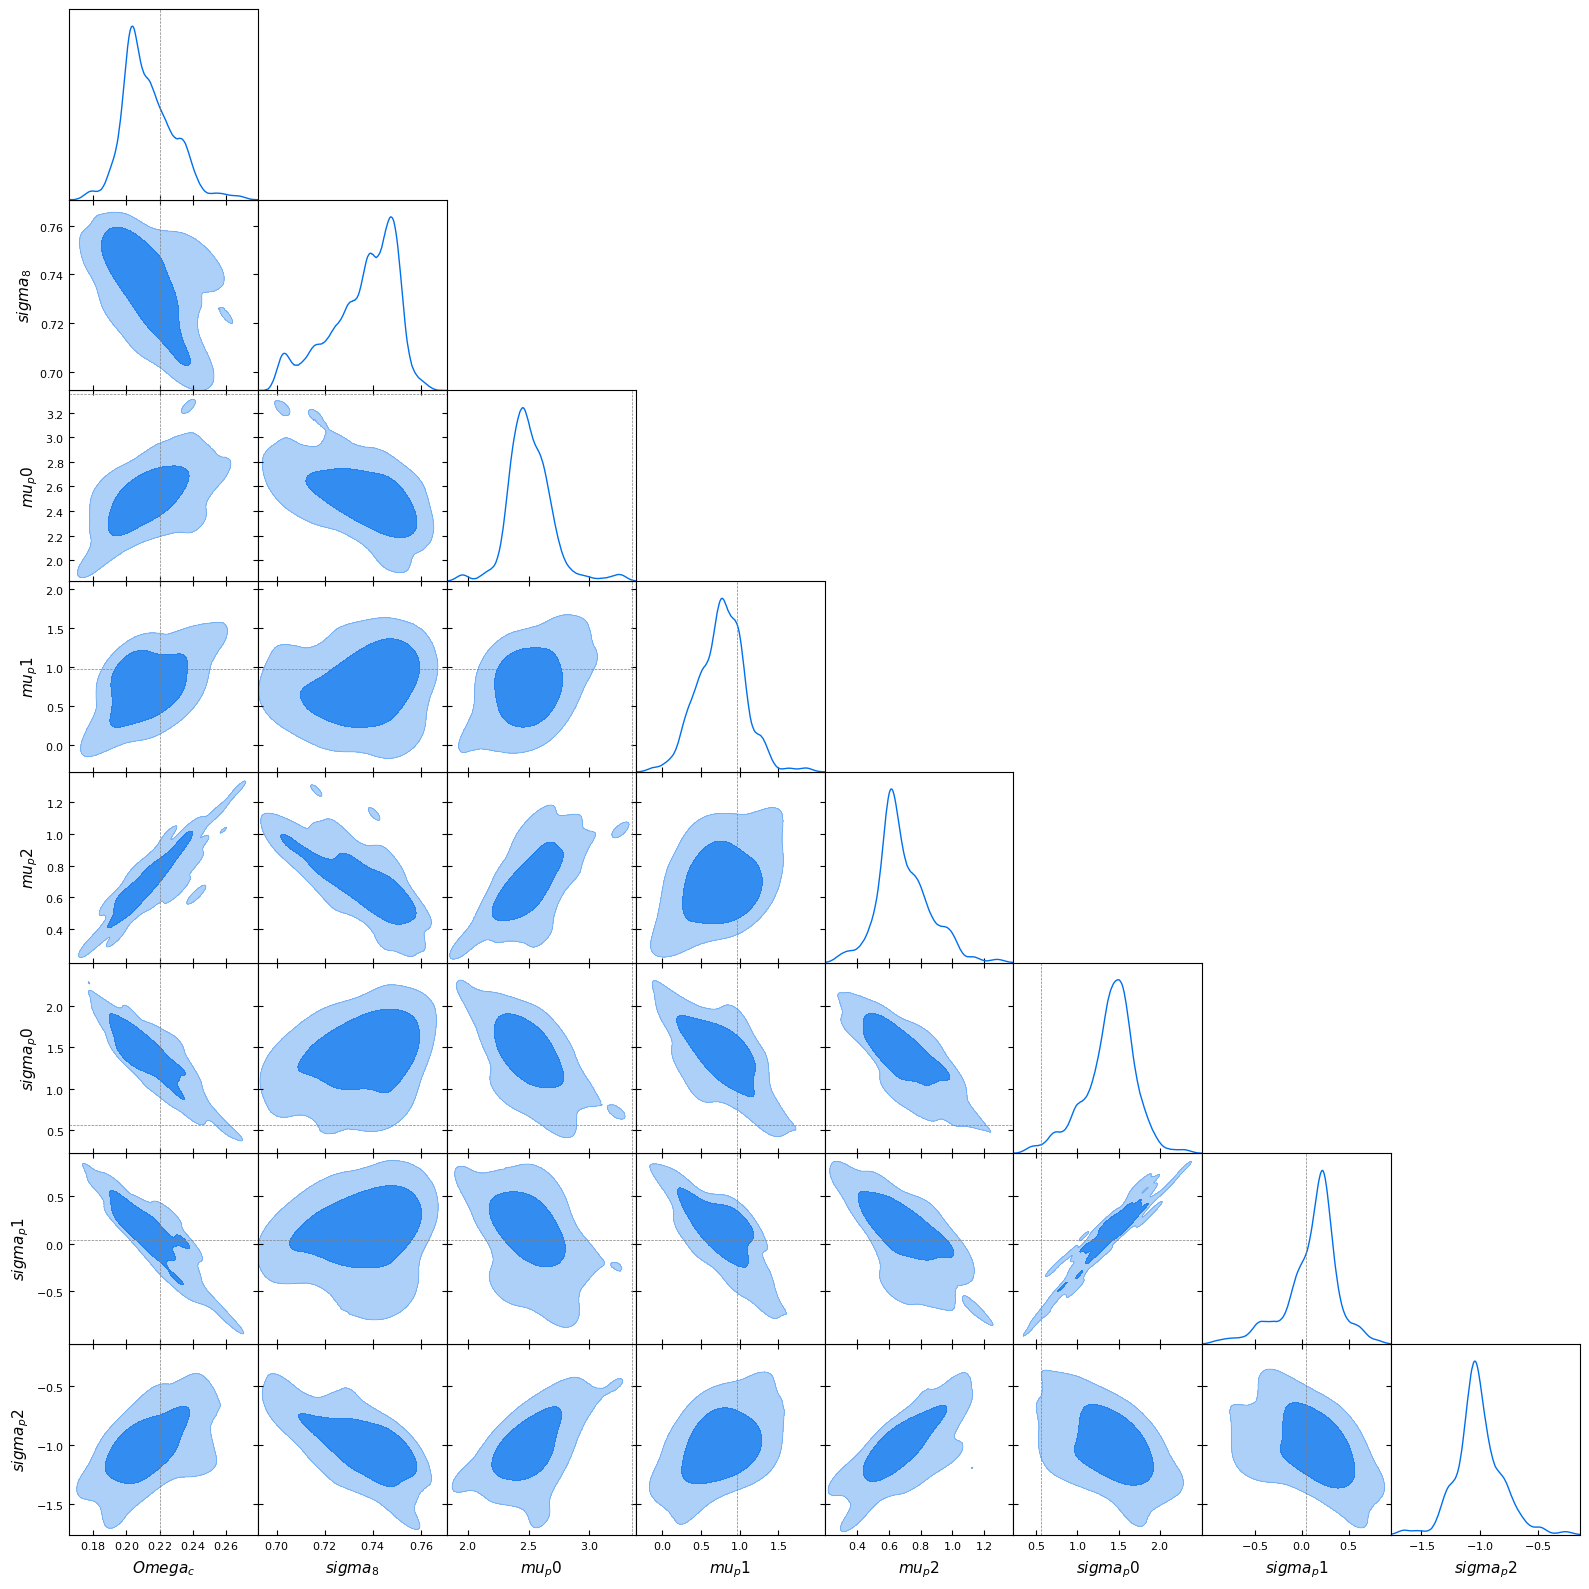

{'Omega_c': 0.22, 'sigma_8': 0.8, 'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/mr_cp/output/number_counts_samples.txt
Removed no burn in
7560


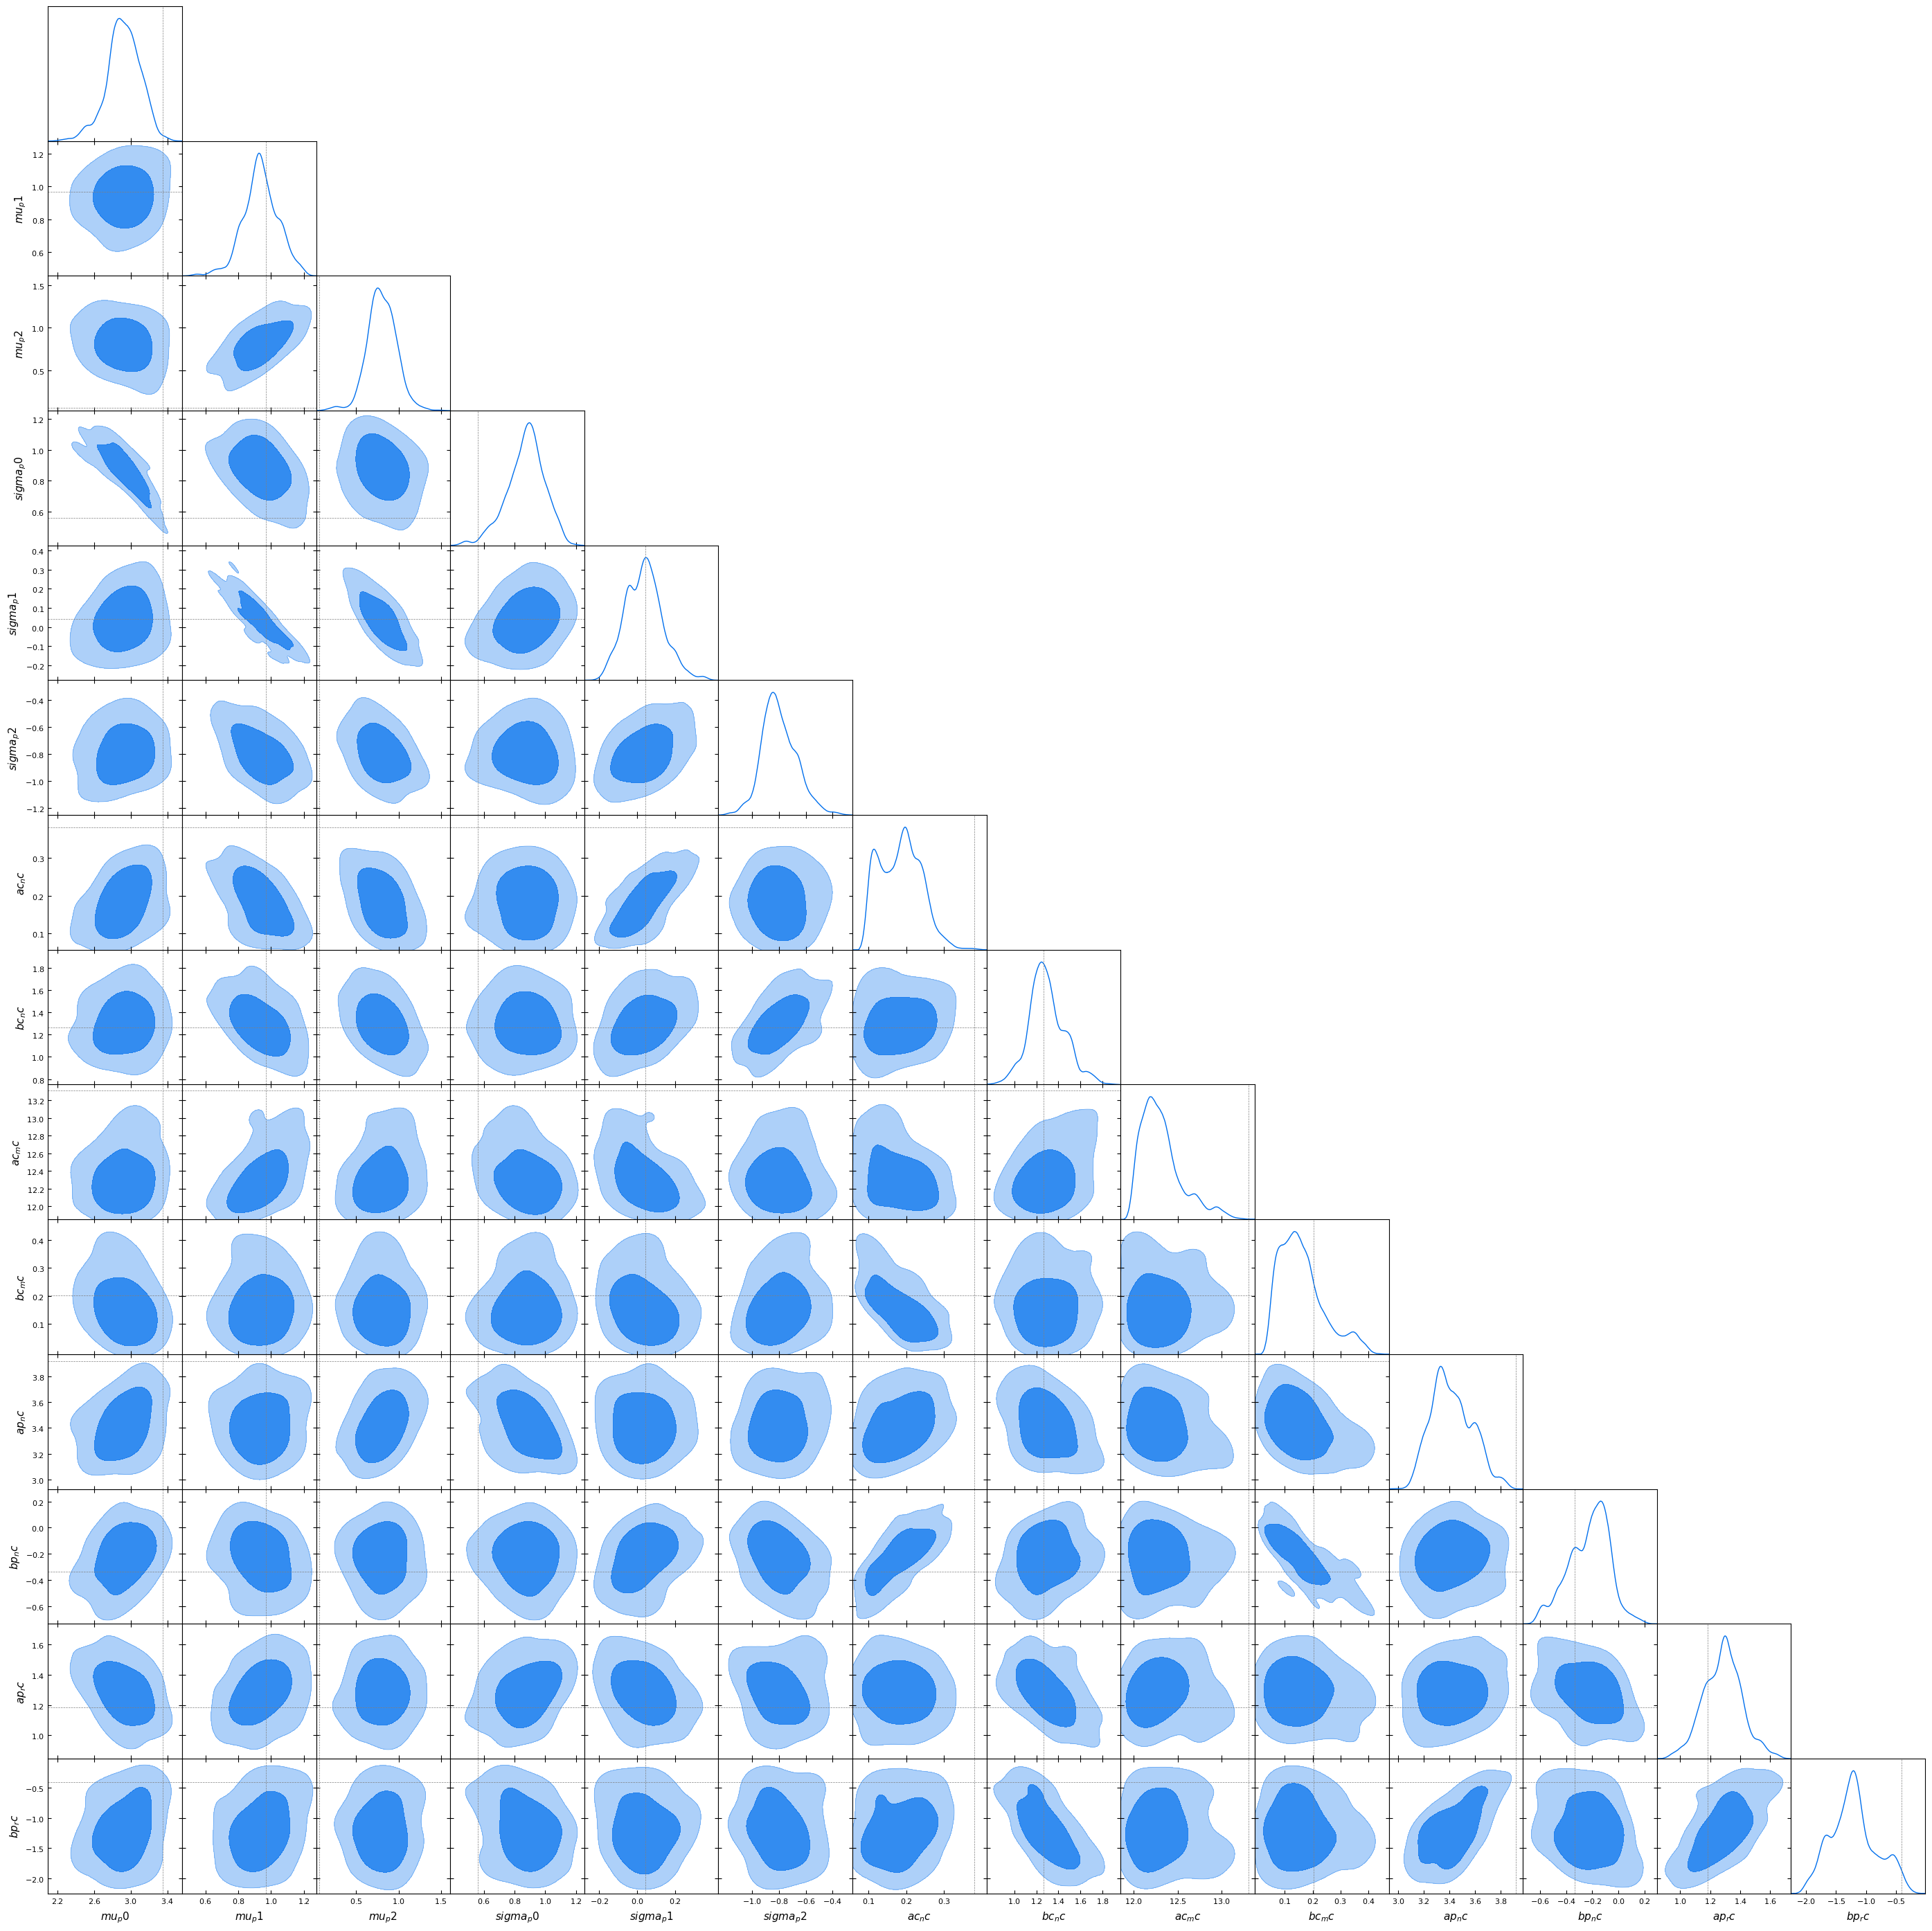

{'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05, 'ac_nc': 0.38, 'bc_nc': 1.2634, 'ac_mc': 13.31, 'bc_mc': 0.2025, 'ap_nc': 3.9193, 'bp_nc': -0.3323, 'ap_rc': 1.1839, 'bp_rc': -0.4077}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/mr/output/number_counts_samples.txt
Removed no burn in
1680


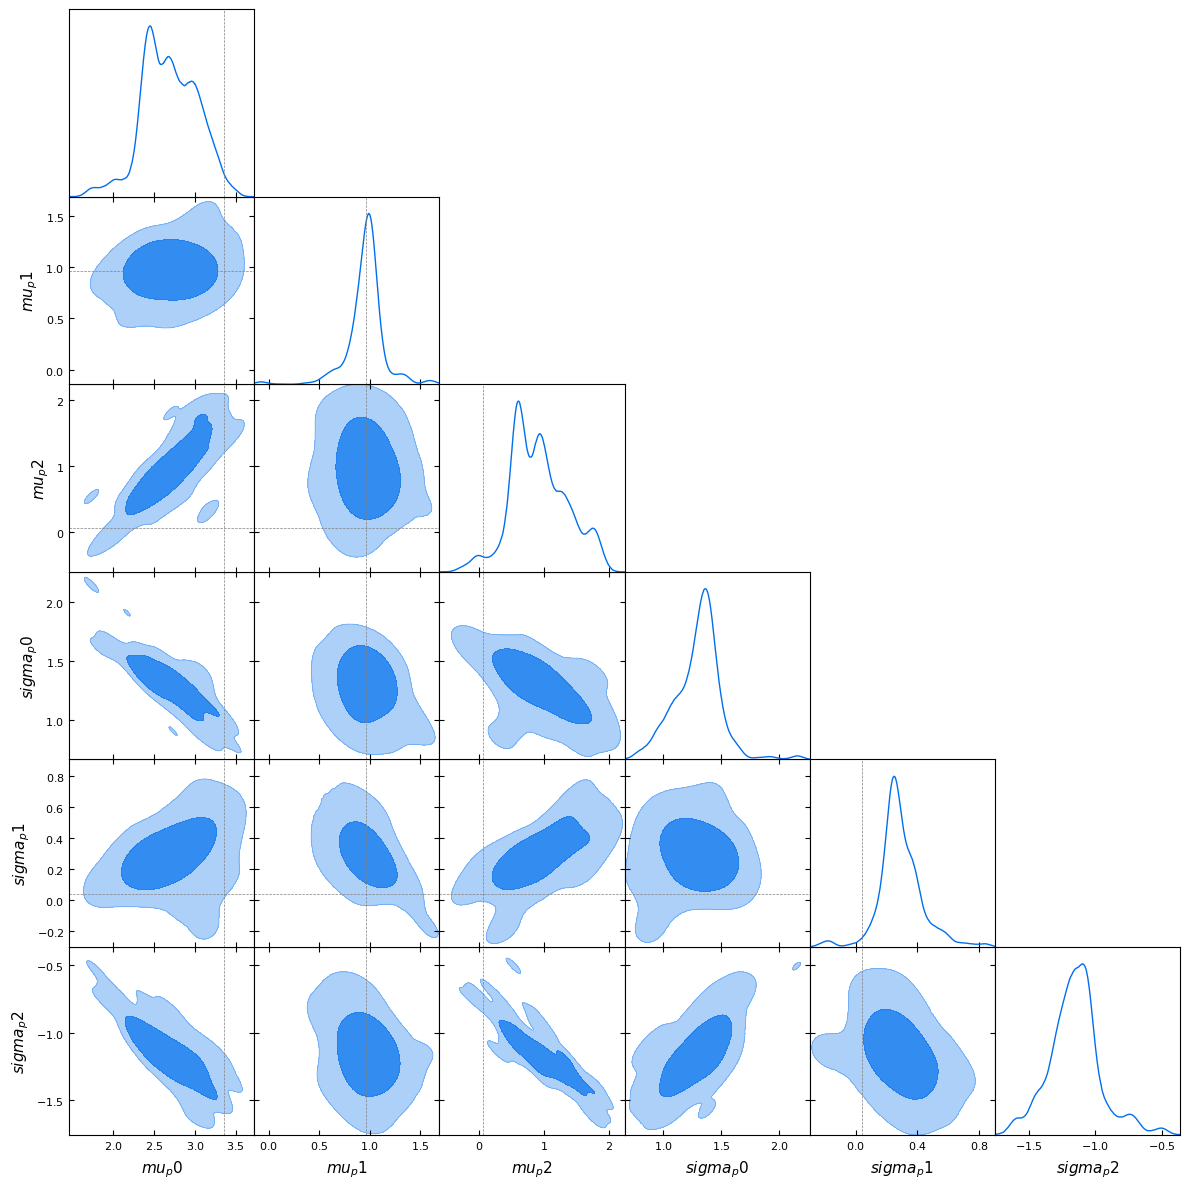

{'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cp/output/number_counts_samples.txt
Removed no burn in
160080


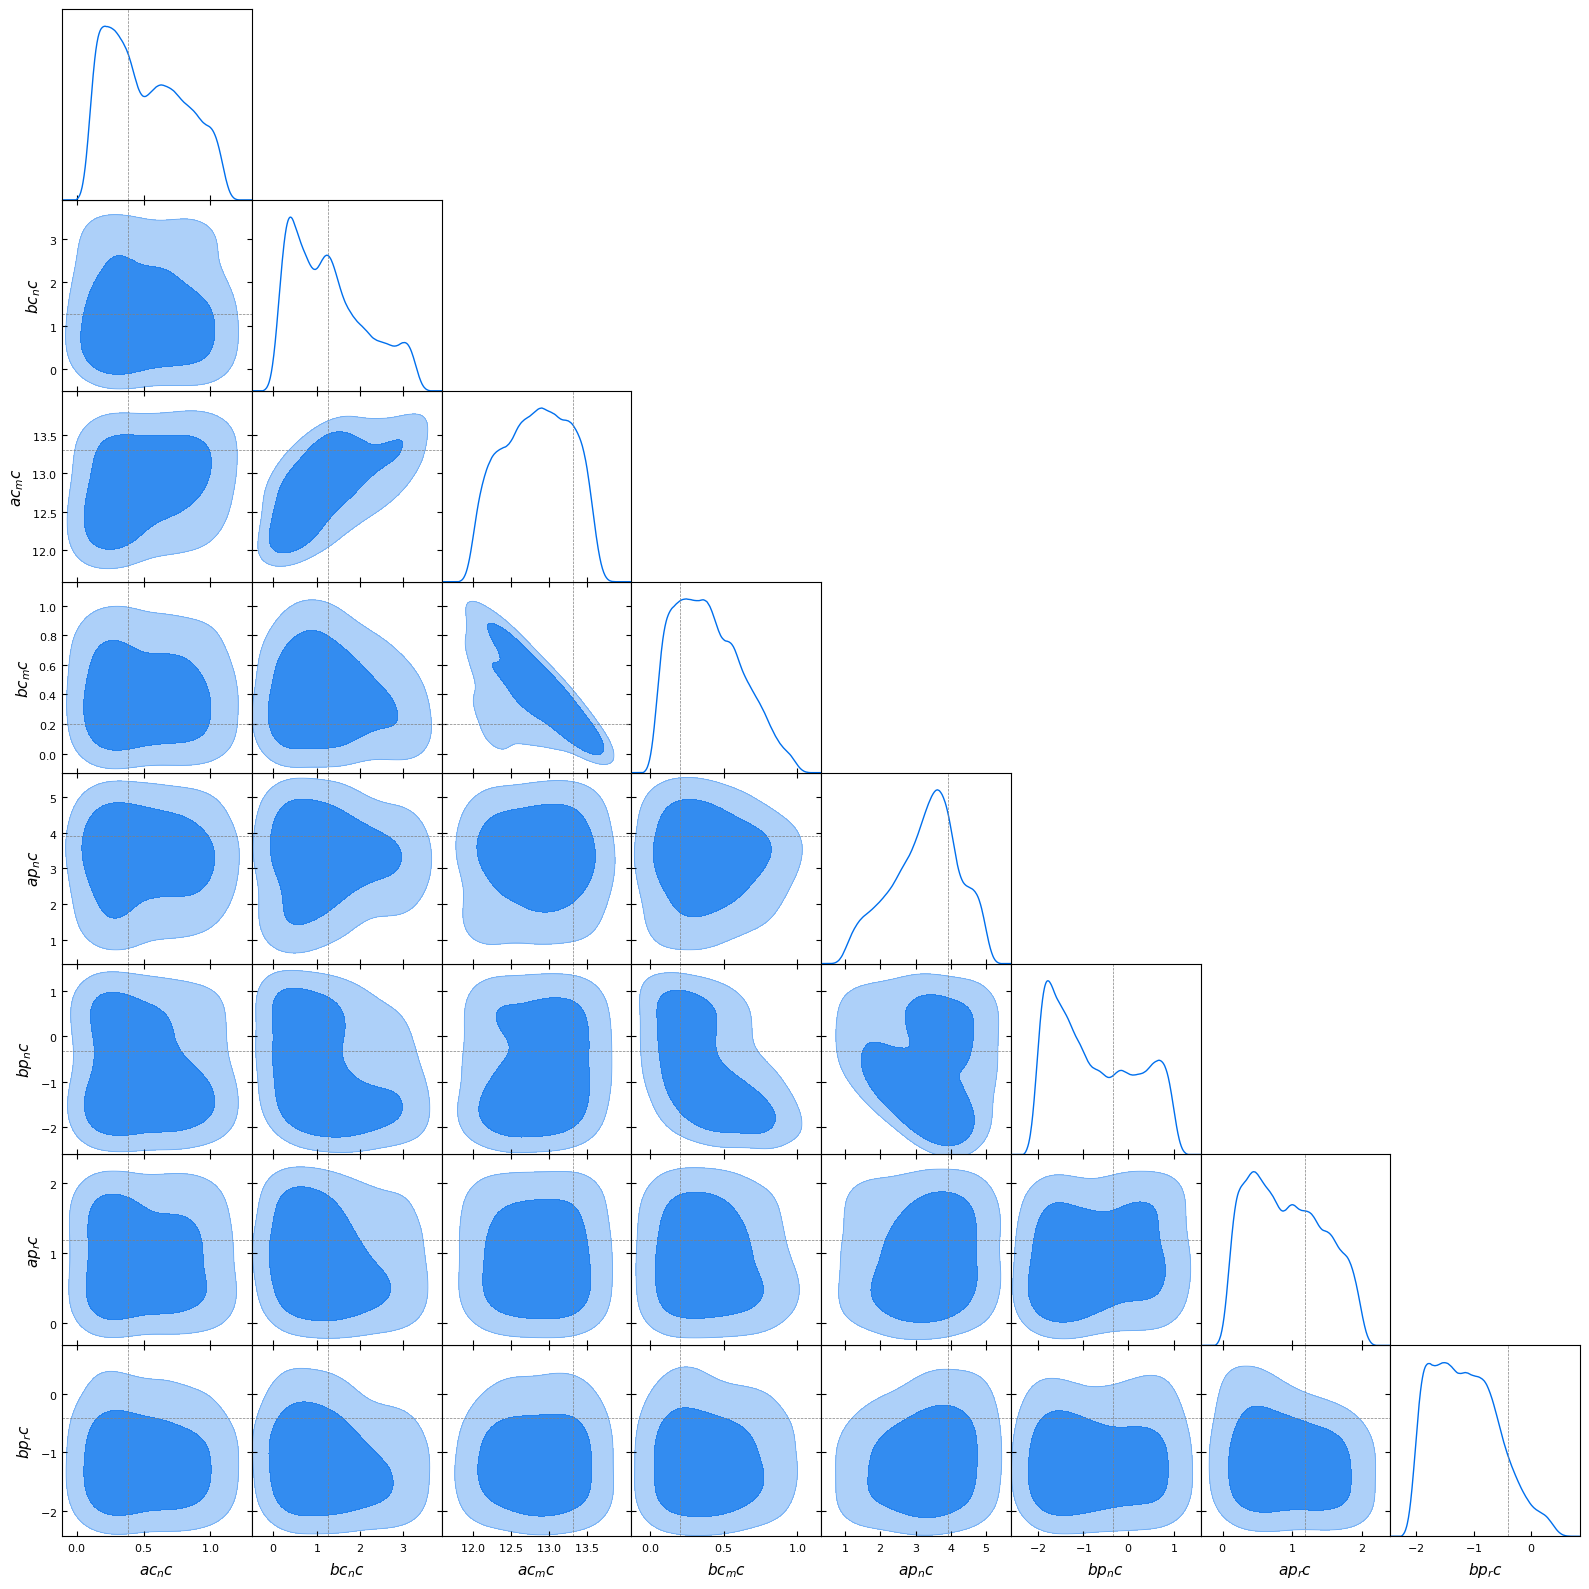

{'ac_nc': 0.38, 'bc_nc': 1.2634, 'ac_mc': 13.31, 'bc_mc': 0.2025, 'ap_nc': 3.9193, 'bp_nc': -0.3323, 'ap_rc': 1.1839, 'bp_rc': -0.4077}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [7]:


# Example usage:
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cosmo_mr_cp/output/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05),
    ("ac_nc", 0.38),
    ("bc_nc", 1.2634),
    ("ac_mc", 13.31),
    ("bc_mc", 0.2025),
    ("ap_nc", 3.9193),
    ("bp_nc", -0.3323),
    ("ap_rc", 1.1839),
    ("bp_rc", -0.4077)])
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cosmo/output/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800)])
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cosmo_cp/output/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("ac_nc", 0.38),
    ("bc_nc", 1.2634),
    ("ac_mc", 13.31),
    ("bc_mc", 0.2025),
    ("ap_nc", 3.9193),
    ("bp_nc", -0.3323),
    ("ap_rc", 1.1839),
    ("bp_rc", -0.4077)])
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cosmo_mr/output/number_counts_samples.txt", [
    ("Omega_c", 0.22),
    ("sigma_8", 0.800),
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/mr_cp/output/number_counts_samples.txt", [
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05),
    ("ac_nc", 0.38),
    ("bc_nc", 1.2634),
    ("ac_mc", 13.31),
    ("bc_mc", 0.2025),
    ("ap_nc", 3.9193),
    ("bp_nc", -0.3323),
    ("ap_rc", 1.1839),
    ("bp_rc", -0.4077)])
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/mr/output/number_counts_samples.txt", [
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])
generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/cp/output/number_counts_samples.txt", [
    ("ac_nc", 0.38),
    ("bc_nc", 1.2634),
    ("ac_mc", 13.31),
    ("bc_mc", 0.2025),
    ("ap_nc", 3.9193),
    ("bp_nc", -0.3323),
    ("ap_rc", 1.1839),
    ("bp_rc", -0.4077)])


LOADING CHAIN FROM FILE:  /pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/mr/output/number_counts_samples.txt
Removed no burn in
6720


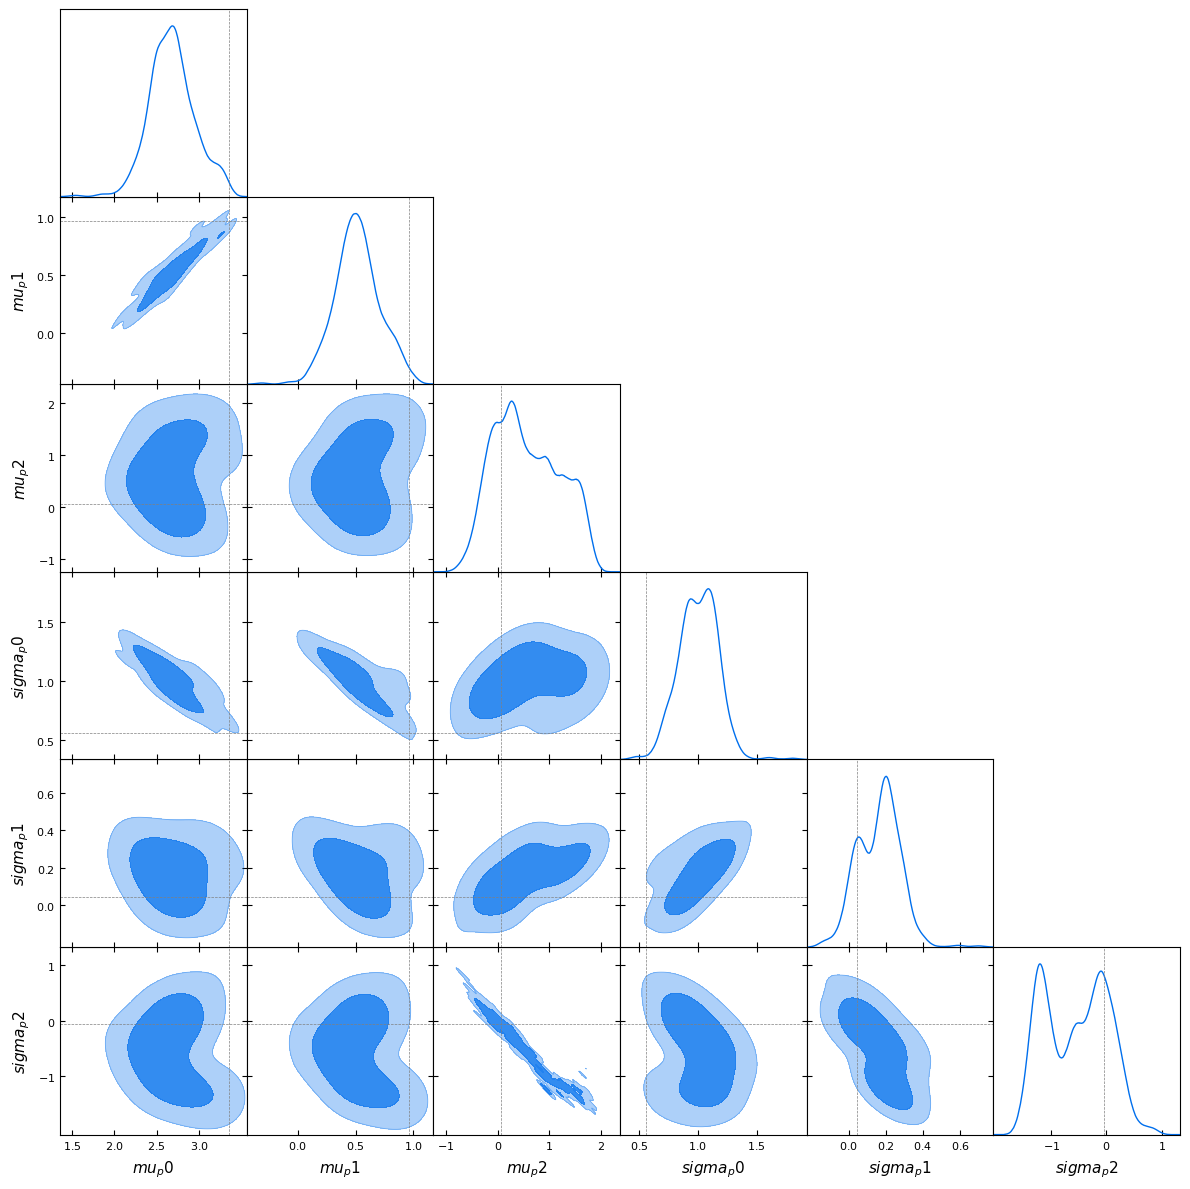

{'mu_p0': 3.35, 'mu_p1': 0.968, 'mu_p2': 0.06, 'sigma_p0': 0.56, 'sigma_p1': 0.043, 'sigma_p2': -0.05}

 Using data from both 



<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [34]:
data_cp= generate_triangle_plot("/pbs/home/e/ebarroso/CLPipeline/cl_theory_test/Red_selection_test/mr/output/number_counts_samples.txt", [
    ("mu_p0",3.35),
    ("mu_p1", 0.968),
    ("mu_p2", 0.06),
    ("sigma_p0", 0.56),
    ("sigma_p1", 0.043),
    ("sigma_p2", -0.05)
])

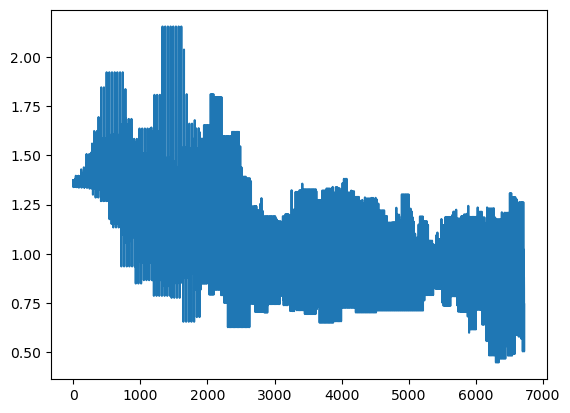

In [35]:
data_print = [data[3] for data in data_cp]
plt.plot(np.linspace(0,len(data_print), len(data_print)),data_print )